<a href="https://colab.research.google.com/github/ezrafield/hoanglong.github.io/blob/gh-pages/social_network_ads_anh_Dat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# câu 4

In [2]:
ngaysinh = input()
print(" ờ ừm, không biết nói gì cả, check check check :v ngày sinh {}".format(ngaysinh))


 ờ ừm, không biết nói gì cả, check check check :v ngày sinh 


# Câu 5:

In [3]:
# upload file

from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [4]:
# read data
import pandas as pd
social_df = pd.read_csv("Social_Network_Ads.csv")
social_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
social_df.shape

(400, 5)

tức 400 dòng 5 cột

# câu 6

In [8]:
# read n top m bottom (nhập n m cho nhanh)
n = int(input("n ="))
m = int(input("m ="))
social_df[:n] # or social_df.head(n)

n =4
m =9


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0


In [9]:
social_df[-m:] # or social_df.tail(m)

,User ID,Gender,Age,EstimatedSalary,Purchased
391,15592570,Male,47,23000,1
392,15748589,Female,45,45000,1
393,15635893,Male,60,42000,1
394,15757632,Female,39,59000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [10]:
purchasecount = social_df[social_df['Purchased']==1]
purchasecount.shape

(143, 5)

# cần phải plot xem Data trước để chọn model phù hợp

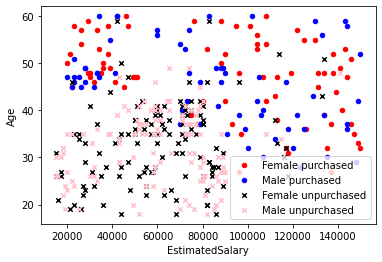

In [11]:
import matplotlib.pyplot as plt
ax = social_df[(social_df['Purchased']==1) & (social_df['Gender']=='Female')].plot(kind='scatter', x ='EstimatedSalary', y='Age', color='Red', marker='o', label = 'Female purchased')
social_df[(social_df['Purchased']==1) & (social_df['Gender']=='Male')].plot(kind='scatter', x ='EstimatedSalary', y='Age', color='Blue', marker='o', label = 'Male purchased', ax=ax)
social_df[(social_df['Purchased']==0) & (social_df['Gender']=='Female')].plot(kind='scatter', x ='EstimatedSalary', y='Age', color='Black', marker='x', label = 'Female unpurchased', ax=ax)
social_df[(social_df['Purchased']==0) & (social_df['Gender']=='Male')].plot(kind='scatter', x ='EstimatedSalary', y='Age', color='Pink', marker='x', label = 'Male unpurchased', ax=ax)
plt.show()

# câu 7

## Data preprocessing

In [12]:
# decide train set - test set
import numpy as np
from sklearn.model_selection import train_test_split

# transform data
social_df['Gender'].replace(['Female', 'Male'], [0,1], inplace = True)
feature_df = social_df[['Gender','Age','EstimatedSalary']]
X = np.asarray(feature_df)
result_df = social_df['Purchased']
y = np.asarray(result_df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 4)

In [13]:
X[:5]

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       [    0,    27, 57000],
       [    1,    19, 76000]])

In [14]:
y[:5]

array([0, 0, 0, 0, 0])

## SVM

In [15]:
from sklearn import svm
pred_svm = svm.SVC(kernel ='rbf') # rbf = Radial Basis Function
# 4 style: Linear, Polynomial, RBF, Sigmoid
pred_svm.fit(X_train, y_train)

SVC()

In [16]:
yhat_svm = pred_svm.predict(X_test)
yhat_svm[:5]

array([0, 0, 0, 0, 0])

## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

k=2
pred_knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
yhat_knn = pred_knn.predict(X_test)
yhat_knn[:5]

array([0, 0, 0, 0, 0])

## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

pred_tree = DecisionTreeClassifier(criterion= "entropy", max_depth=3)
pred_tree

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [19]:
pred_tree.fit(X_train, y_train)
yhat_tree = pred_tree.predict(X_test)

# câu 8

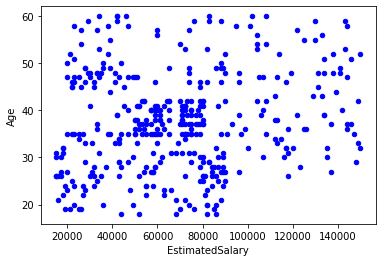

In [20]:
ax = social_df.plot(kind='scatter', x ='EstimatedSalary', y='Age', color='Blue', marker='o')
plt.show()

# Câu 9

In [21]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(yhat_tree, y_test))
print("SVM's Accuracy: ", metrics.accuracy_score(yhat_svm, y_test))
print("KNN's Accuracy: ", metrics.accuracy_score(yhat_knn, y_test))

DecisionTrees's Accuracy:  0.9166666666666666
SVM's Accuracy:  0.7833333333333333
KNN's Accuracy:  0.7916666666666666


## F1 Score

In [22]:
from matplotlib.cbook import normalize_kwargs
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize = False, title='Confusion matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix without noemalization")
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() /2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i , format(cm[i,j], fmt), horizontalalignment = "center", color = "white" if cm[i,j] > thresh else "black")

  plt.tight_layout
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

### SVM

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        81
           1       0.84      0.41      0.55        39

    accuracy                           0.78       120
   macro avg       0.81      0.69      0.70       120
weighted avg       0.79      0.78      0.76       120

Confusion matrix without noemalization
[[78  3]
 [23 16]]


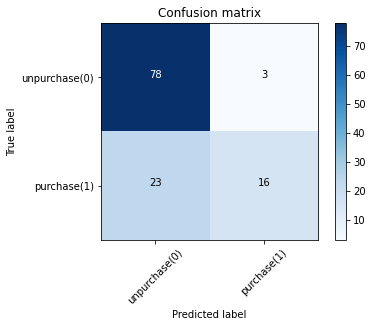

In [23]:
cnf_matrix_svm = confusion_matrix(y_test, yhat_svm, labels =[0,1])
np.set_printoptions(precision=2)
print(classification_report(y_test,yhat_svm))
plt.figure()
plot_confusion_matrix(cnf_matrix_svm, classes=['unpurchase(0)','purchase(1)'], normalize = False, title = 'Confusion matrix')

### KNN

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        81
           1       0.82      0.46      0.59        39

    accuracy                           0.79       120
   macro avg       0.80      0.71      0.73       120
weighted avg       0.80      0.79      0.77       120

Confusion matrix without noemalization
[[77  4]
 [21 18]]


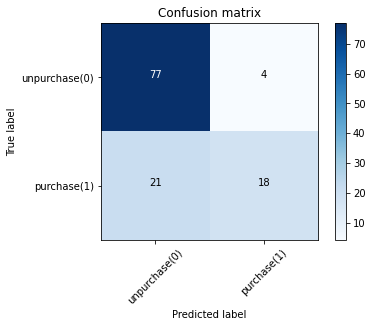

In [24]:
cnf_matrix_knn = confusion_matrix(y_test, yhat_knn, labels =[0,1])
np.set_printoptions(precision=2)
print(classification_report(y_test,yhat_knn))
plt.figure()
plot_confusion_matrix(cnf_matrix_knn, classes=['unpurchase(0)','purchase(1)'], normalize = False, title = 'Confusion matrix')

### Decision Tree

              precision    recall  f1-score   support

           0       0.99      0.89      0.94        81
           1       0.81      0.97      0.88        39

    accuracy                           0.92       120
   macro avg       0.90      0.93      0.91       120
weighted avg       0.93      0.92      0.92       120

Confusion matrix without noemalization
[[72  9]
 [ 1 38]]


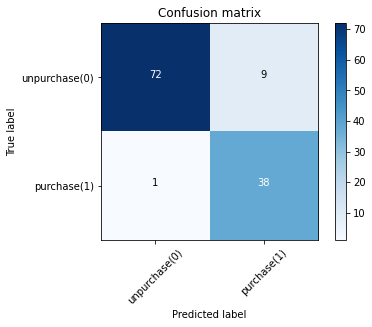

In [25]:
cnf_matrix_tree = confusion_matrix(y_test, yhat_tree, labels =[0,1])
np.set_printoptions(precision=2)
print(classification_report(y_test,yhat_tree))
plt.figure()
plot_confusion_matrix(cnf_matrix_tree, classes=['unpurchase(0)','purchase(1)'], normalize = False, title = 'Confusion matrix')

# Vậy là Decission Tree tốt nhất, dùng model này để dự đoán người mới, câu 10

In [26]:
#Gender	Age	EstimatedSalary , Purchase
checkgender = True
while checkgender:
  boolgender = input('gender = ')
  if boolgender == "Female": gender = 0
  elif boolgender == "Male": gender = 1
  else: 
      print('Error')
      continue
  checkgender = False
Agenew = int(input('Age ='))
EstimatedSalarynew = int(input('EstimatedSalary = '))
X_new = [[gender, Agenew, EstimatedSalarynew]]
yhat_new = pred_tree.predict(X_new)
if yhat_new == 1: print('Purchase: 1')
else: print('Purchase: 0')

gender = Male
Age =40
EstimatedSalary = 40000
Purchase: 0
